In [106]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import plot_tree
import pickle

In [107]:
results = pd.read_csv('test-log.csv')

In [124]:
results.tail()

,prune_v0,prune_v1,prune_v2,prune_v3,prune_v4,prune_v5,prune_v6,prune_v7,prune_v8,prune_v9,prune_v10,prune_v11,mean_class_acc
1656,0.14,0.82,0.28,1.00,0.22,0.98,0.44,0.04,0.40,0.04,0.20,0.44,0.275758
1657,0.64,0.56,0.18,0.04,0.14,0.44,0.16,0.40,0.98,0.72,0.50,0.64,0.865758
1658,0.92,1.00,0.04,0.36,0.08,0.76,0.54,0.32,0.76,0.36,0.54,1.00,0.124848
1659,0.90,0.80,0.42,0.96,0.38,0.62,0.56,0.46,0.28,0.62,0.26,0.86,0.872727
1660,0.88,0.58,0.16,0.28,0.14,0.22,0.92,0.90,0.74,0.54,0.28,0.72,0.874242


In [109]:
X = results.iloc[:, :-1].values
Y = results.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [110]:
[X.shape, Y.shape], [X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(1661, 12), (1661,)], [(1328, 12), (1328,)], [(333, 12), (333,)])

In [111]:
model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist'
)

In [112]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [113]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [114]:
y_pred = model.predict(X_test)

In [115]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print(f"Accuracy: {model.score(X_test, y_test)*100:.2f}%")

R² Score: 0.9402310678358563
MSE: 0.005068954049426168
Accuracy: 94.02%


In [116]:
importance = model.feature_importances_

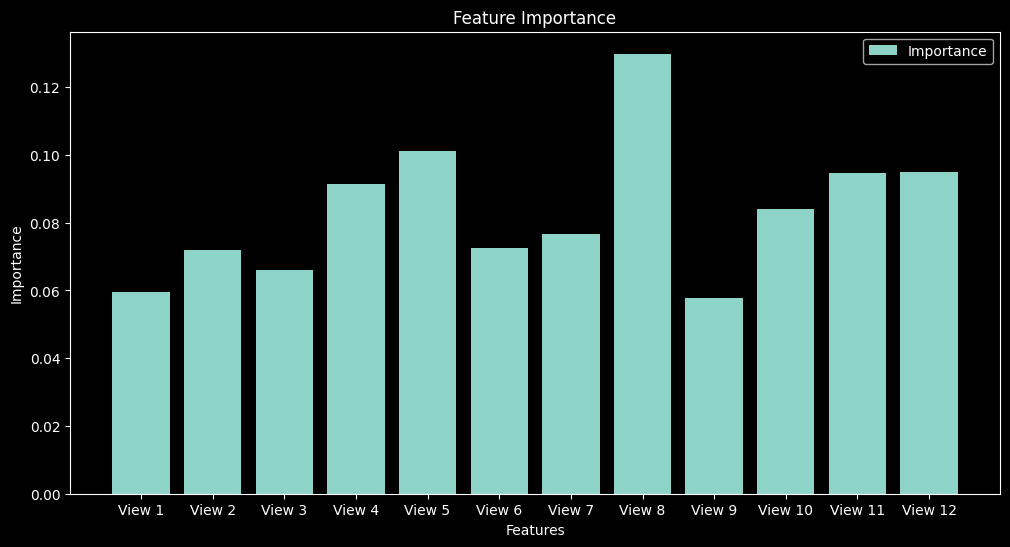

In [117]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(importance)), importance, tick_label=[f'View {i+1}' for i in range(len(importance))])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.legend(['Importance'])
plt.show()

In [118]:
input_data = [[1.0]*12]

In [119]:
model.predict(input_data)

array([0.01606201], dtype=float32)

<Figure size 1000x600 with 0 Axes>

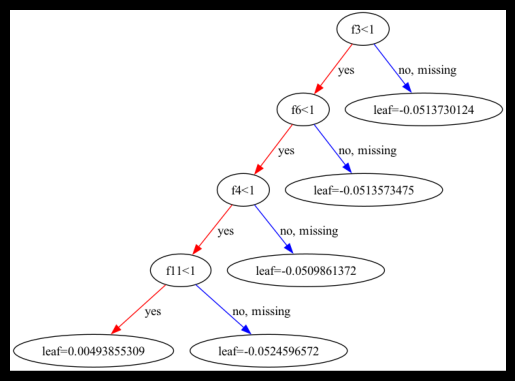

In [120]:
plt.figure(figsize=(10, 6))
plot_tree(model, rankdir='TD')
plt.show()

In [121]:
print("\n".join([model.get_booster().get_dump()[i] for i in range(20)]))

0:[f3<1] yes=1,no=2,missing=2
	1:[f6<1] yes=3,no=4,missing=4
		3:[f4<1] yes=5,no=6,missing=6
			5:[f11<1] yes=7,no=8,missing=8
				7:leaf=0.00493855309
				8:leaf=-0.0524596572
			6:leaf=-0.0509861372
		4:leaf=-0.0513573475
	2:leaf=-0.0513730124

0:[f10<1] yes=1,no=2,missing=2
	1:[f2<1] yes=3,no=4,missing=4
		3:[f7<1] yes=5,no=6,missing=6
			5:[f8<1] yes=7,no=8,missing=8
				7:leaf=0.00401074113
				8:leaf=-0.04970406
			6:leaf=-0.050665509
		4:leaf=-0.050595101
	2:leaf=-0.0498114005

0:[f3<1] yes=1,no=2,missing=2
	1:[f10<1] yes=3,no=4,missing=4
		3:[f4<1] yes=5,no=6,missing=6
			5:[f1<1] yes=7,no=8,missing=8
				7:leaf=0.00499163289
				8:leaf=-0.0505252182
			6:leaf=-0.0457075574
		4:leaf=-0.0458812267
	2:leaf=-0.0465923958

0:[f0<1] yes=1,no=2,missing=2
	1:[f3<1] yes=3,no=4,missing=4
		3:[f2<1] yes=5,no=6,missing=6
			5:[f5<1] yes=7,no=8,missing=8
				7:leaf=0.00400857022
				8:leaf=-0.0520461686
			6:leaf=-0.0455950983
		4:leaf=-0.0405656882
	2:leaf=-0.0510993898

0:[f9<1] yes=1,no

In [122]:
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)